In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("kidney_disease.csv")

In [20]:
df.isnull().sum()*100/len(df)

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [21]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Imputer for numerical columns (using median)
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Imputer for categorical columns (using most frequent / mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [22]:
df.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

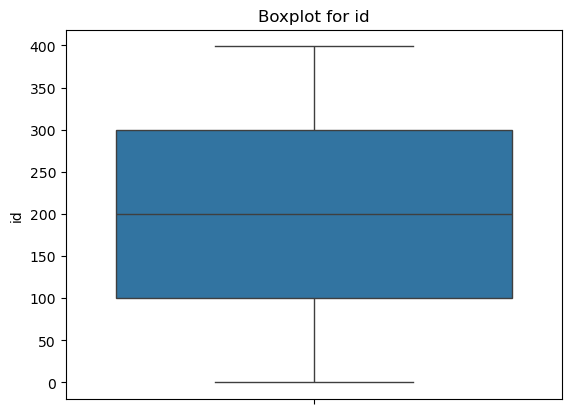

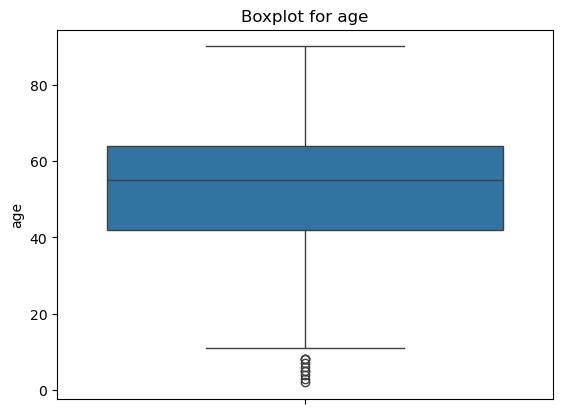

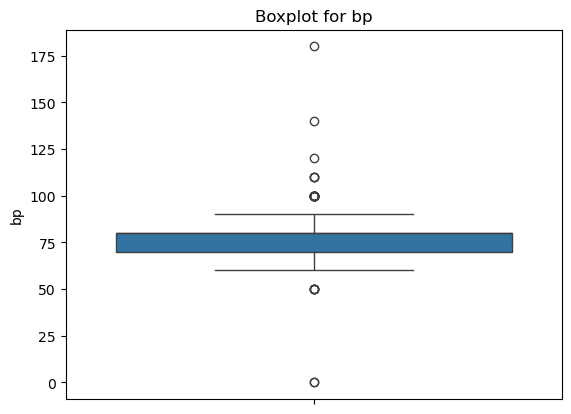

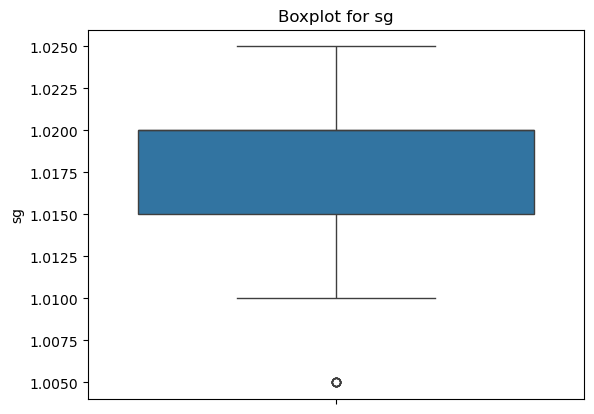

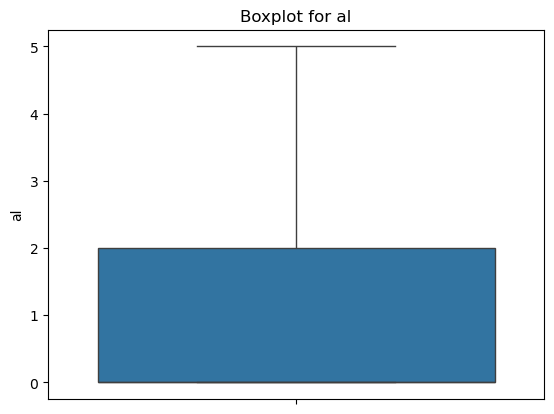

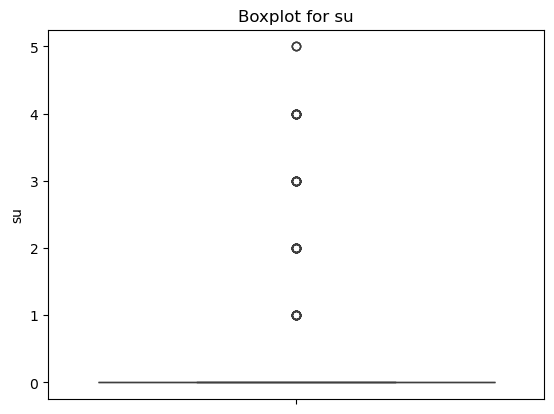

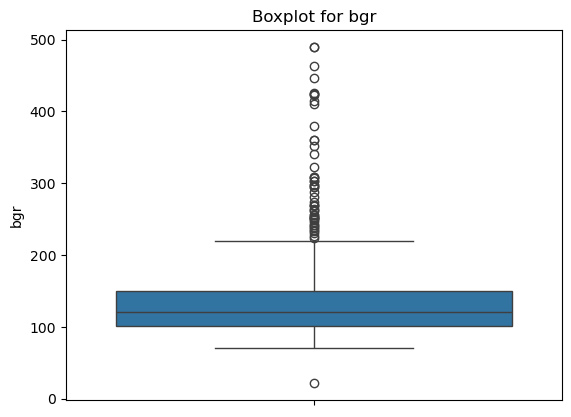

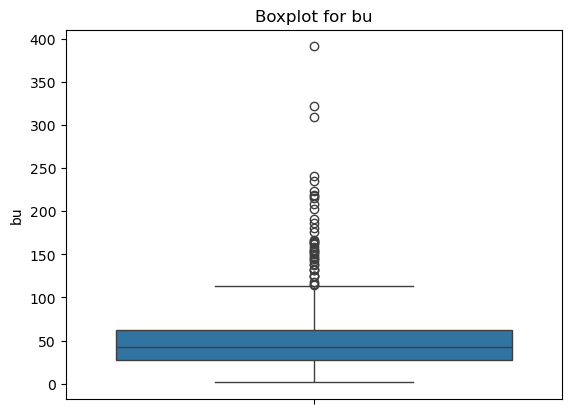

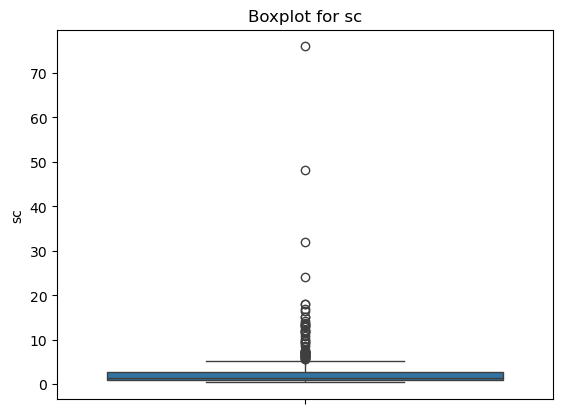

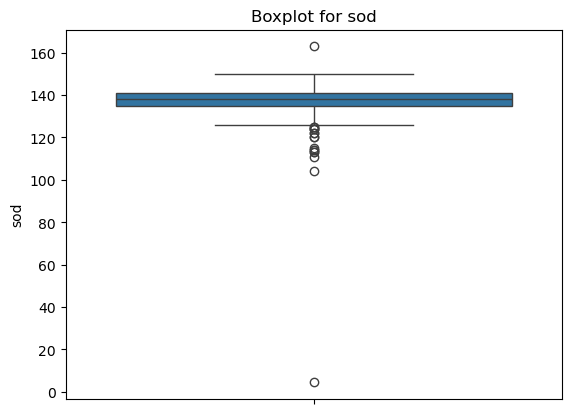

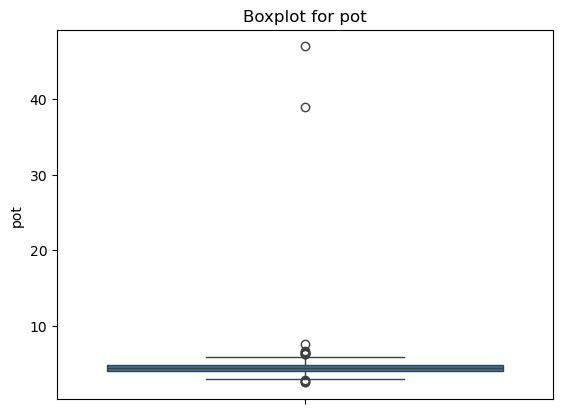

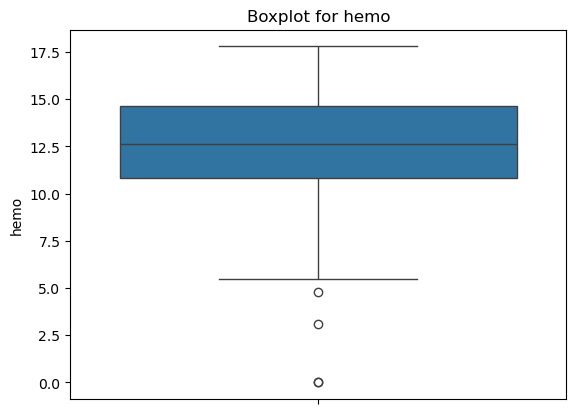

In [23]:
def outlier(df):
    for col in df.select_dtypes(include=['float64','int64']).columns:
        if col != 'classification':
            sns.boxplot(df[col])
            plt.title(f'Boxplot for {col}')
            plt.show()

outlier(df)

In [24]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    df[col]= np.where(df[col]>upper,upper,df[col])
    df[col] = np.where(df[col]<lower,lower,df[col])

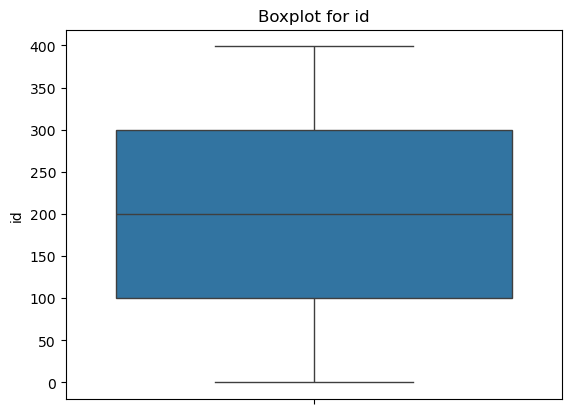

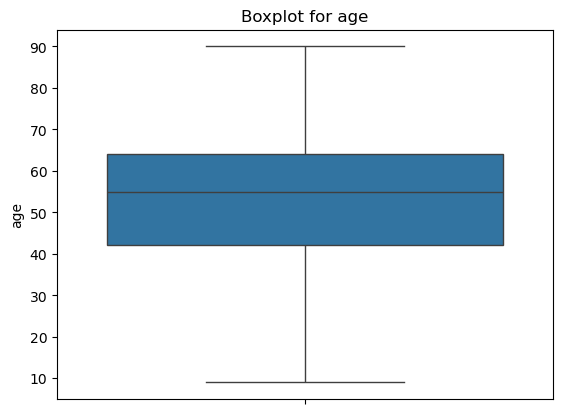

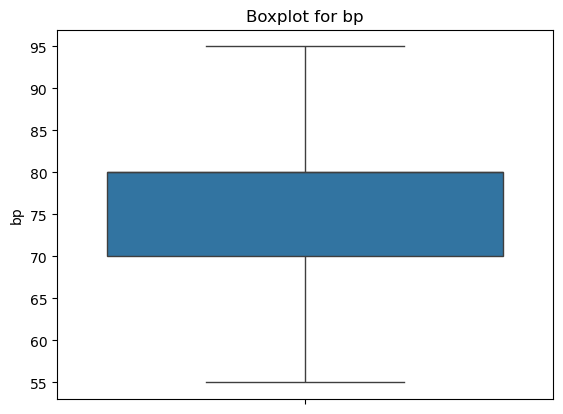

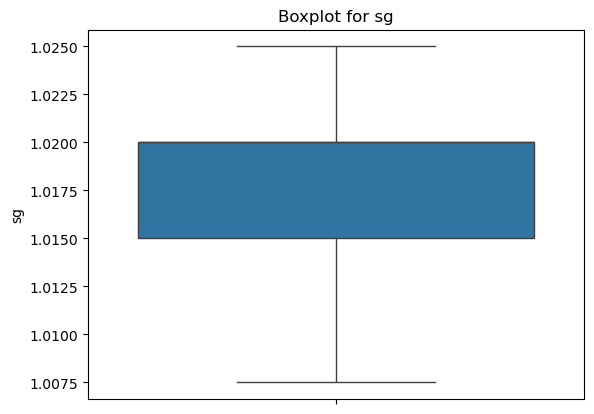

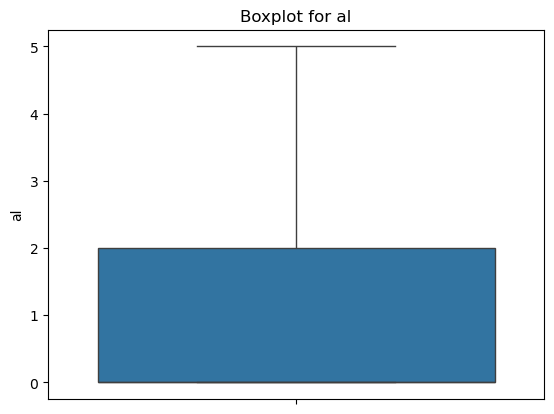

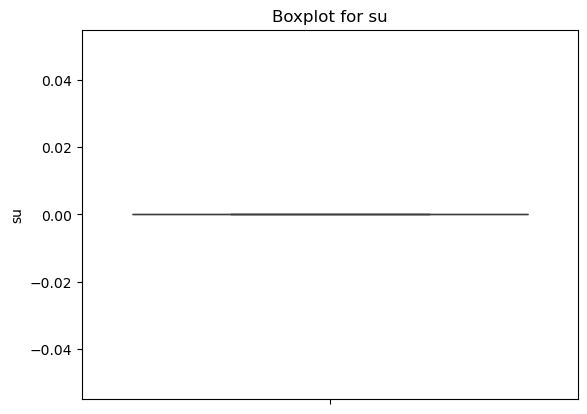

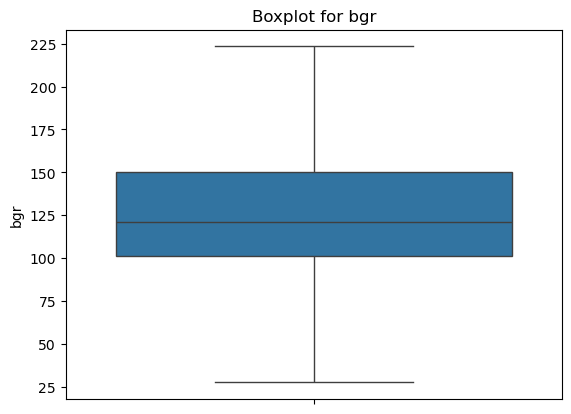

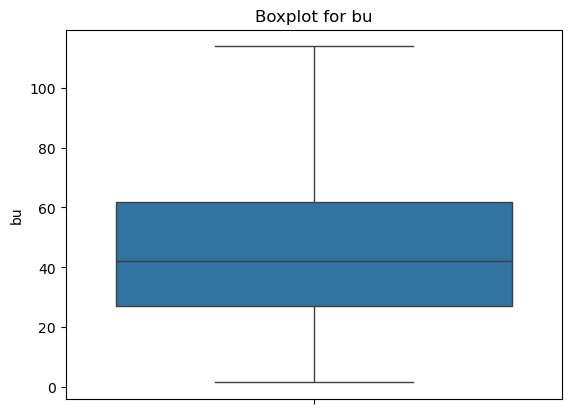

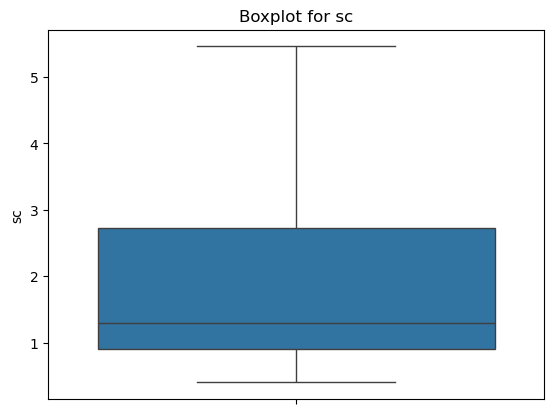

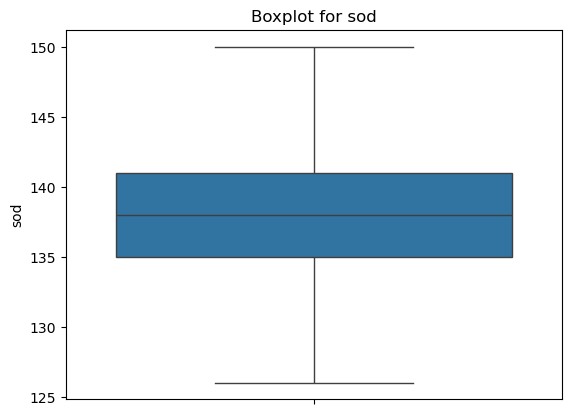

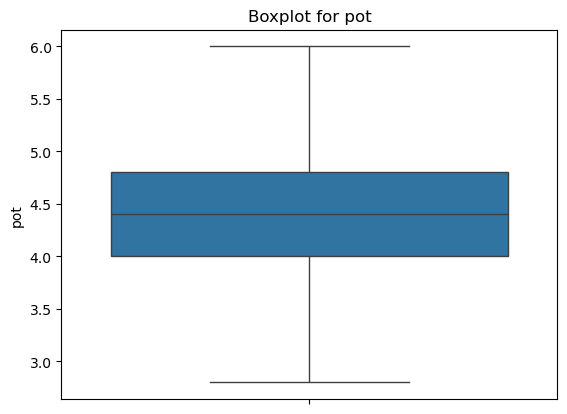

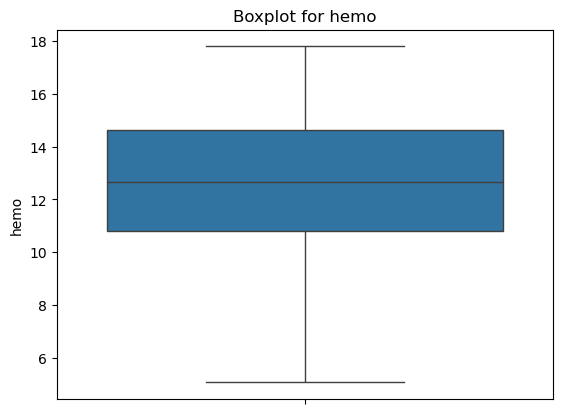

In [25]:
outlier(df)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [27]:
for col in df.select_dtypes(include=['float64','int64','object']).columns:
    print(f'*********************{col}***********************\n',df[col].unique())

*********************id***********************
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187

In [28]:
df['classification']=df['classification'].apply(lambda x: 'ckd' if x=='ckd\t' else x)
df['cad']=df['cad'].apply(lambda x: 'no' if x=='\tno' else x)
df['dm']=df['dm'].apply(lambda x: 'no' if x=='\tno' else x)
df['dm']=df['dm'].apply(lambda x: 'yes' if x=='\tyes' or x==' yes' else x)
# df['rc']=df['rc'].apply(lambda x: df['rc'].mean() if x=='\t?' else x)
df['wc']=df['wc'].apply(lambda x: '6200' if x=='\t6200' else x)
df['wc']=df['wc'].apply(lambda x: '8400' if x=='\t8400' else x)
# df['wc']=df['wc'].apply(lambda x: df['wc'].mean() if x=='\t?' else x)
# df['pcv']=df['pcv'].apply(lambda x: df['pcv'].mean() if x=='\t?' else x)
df['pcv']=df['pcv'].apply(lambda x: 43 if x=='\t43' else x)


In [30]:
number_col=['rc', 'wc', 'pcv']
for col in number_col:
    df[col]=df[col].replace("	?", np.nan)
    df[col]=pd.to_numeric(df[col])
    df[col]=df[col].replace(np.nan, df[col].median())
    print(f'----------------------------------{col}-----------------------------------------\n',df[col].unique())

----------------------------------rc-----------------------------------------
 [5.2 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5 4.2
 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1 6.2
 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6.5]
----------------------------------wc-----------------------------------------
 [ 7800.  6000.  7500.  6700.  7300.  9800.  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.  7200.
  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200. 12500.
  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600. 10200.
  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.  4700.
 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.  2600.
 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700. 11500.
  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
-------------------------

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [34]:
df.drop('id',axis=1,inplace=True)

In [35]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.0200,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,9.0,55.0,1.0200,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.0100,2.0,0.0,1,1,0,0,223.5,...,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.0075,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,55.0,1.0100,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.0200,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.0250,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.0200,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.0250,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [36]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [39]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x,y = over.fit_resample(x,y)

In [40]:
y.value_counts()

classification
0                 250
1                 250
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
sc = StandardScaler()
sc.fit_transform(x_train)
sc.fit_transform(x_test)

array([[ 1.73054845,  1.44462906,  0.27915759, ..., -0.42008403,
        -0.40347329,  2.84445234],
       [-0.49953976,  0.55835356,  1.16537218, ..., -0.42008403,
        -0.40347329, -0.35156152],
       [ 0.61550435,  1.44462906, -1.93637887, ...,  2.38047614,
         2.4784788 ,  2.84445234],
       ...,
       [ 1.39603522, -0.32792193, -1.49327158, ...,  2.38047614,
        -0.40347329, -0.35156152],
       [ 1.39603522,  0.55835356,  0.27915759, ..., -0.42008403,
         2.4784788 , -0.35156152],
       [ 1.45178742,  1.44462906, -1.49327158, ..., -0.42008403,
        -0.40347329, -0.35156152]])

In [47]:
gdb = GradientBoostingClassifier()
gdb.fit(x_train,y_train)
y_pred_train = gdb.predict(x_train)
y_pred_test = gdb.predict(x_test)
accuracy_gd_test = accuracy_score(y_test,y_pred_test)
accuracy_gd_train = accuracy_score(y_train,y_pred_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print("Train:\n",accuracy_gd_train)
print("Test:\n",accuracy_gd_test)

Train:
 1.0
Test:
 0.99


In [50]:
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(gdb,x_train,y_train,cv=15)
test_acc = cross_val_score(gdb,x_test,y_test,cv=15)
print("train_accuracy",train_accuracy.mean())
print("test\n",test_acc.mean())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

train_accuracy 0.9924976258309591
test
 0.9904761904761905
